In [0]:
!pip install face_recognition

yui: [-0.01618621  0.12676553  0.04101232 -0.08212983 -0.10170145  0.06399664
 -0.08012762 -0.06920892  0.19565971 -0.16311909  0.24629012 -0.03446776
 -0.23793235 -0.00717438 -0.01288941  0.18573497 -0.19027297 -0.19959807
 -0.00850713  0.08744164  0.0687931   0.06583904 -0.02882147  0.00756063
 -0.14892201 -0.37328854 -0.13069993 -0.01483569 -0.03284113 -0.05287179
 -0.0194958   0.01886423 -0.18371375  0.03054173  0.09599806  0.13174261
 -0.04212454 -0.10267354  0.13553183  0.03385162 -0.32884604  0.05492631
  0.09521766  0.22434303  0.10832211  0.0291515  -0.02448032 -0.16104546
  0.08472551 -0.17127916  0.07728665  0.1922424   0.08560659  0.09292375
  0.03953448 -0.14626512  0.00909582  0.14718592 -0.11433883 -0.01110623
  0.09750497 -0.02510364  0.05007991 -0.12971154  0.16745317  0.0753113
 -0.11142021 -0.23919821  0.11579249 -0.13103646 -0.10406463  0.13709953
 -0.18124261 -0.24179769 -0.23609209  0.02684948  0.3577823   0.15238692
 -0.13877057  0.03095989  0.03728909 -0.0116590

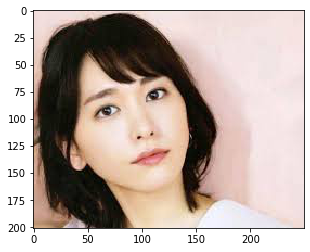

In [7]:
import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline
img = face_recognition.load_image_file("yui.jpeg")
en = face_recognition.face_encodings(img)
print("yui:", en[0])
plt.imshow(img)

In [12]:
import glob
import pandas as pd
encodings = []
names = []
fs = glob.glob("*.jpg") + glob.glob("*.jpeg")
for f in fs:
    img = face_recognition.load_image_file(f)
    en = face_recognition.face_encodings(img)[0]
    encodings.append(list(en))
    names.append(f.split(".")[0])
df = pd.DataFrame({
    "Name":names,
    "Encodings":encodings
})
df.to_csv("face.csv", encoding="utf-8", index=False)
df

,Name,Encodings
0,chiling,"[-0.04465551674365997, 0.116219662129879, 0.13..."
1,ashin,"[-0.051892995834350586, 0.07515525072813034, 0..."
2,yui,"[-0.01618620753288269, 0.12676553428173065, 0...."
3,jay,"[-0.10506394505500793, 0.19111451506614685, 0...."


In [13]:
face_data = pd.read_csv("face.csv", encoding="utf-8")
face_data

,Name,Encodings
0,chiling,"[-0.04465551674365997, 0.116219662129879, 0.13..."
1,ashin,"[-0.051892995834350586, 0.07515525072813034, 0..."
2,yui,"[-0.01618620753288269, 0.12676553428173065, 0...."
3,jay,"[-0.10506394505500793, 0.19111451506614685, 0...."


In [25]:
test = glob.glob("test*.jpg") + glob.glob("test*.jpeg")
faces = face_data["Encodings"].apply(lambda x:eval(x))
names = list(face_data["Name"])
samples = list(faces)
for t in test:
    print(t)
    img = face_recognition.load_image_file(t)
    en = face_recognition.face_encodings(img)[0]
    distance = face_recognition.face_distance(samples, en)
    for n, d in zip(names, distance):
        print("跟{}的距離:{}".format(n, d))
    if min(distance) < 0.5:
        print("檢測到了, 是", names[distance.argmin()])
    print("*" * 30)

test2.jpg
跟chiling的距離:0.6794474220832406
跟ashin的距離:0.46184209351348077
跟yui的距離:0.6093567120910817
跟jay的距離:0.3977801114604278
檢測到了, 是 jay
******************************
test1.jpg
跟chiling的距離:0.4980902561011778
跟ashin的距離:0.5189521393277834
跟yui的距離:0.3712742643226862
跟jay的距離:0.6270164372120947
檢測到了, 是 yui
******************************


In [0]:
_